# Create training vocabulary

In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np
import json

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords as nltk_stopwords

import matplotlib.pyplot as plt

from pprint import pprint

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

from json_buffered_reader import JSON_buffered_reader as JSON_br

import pandas as pd
import settings

from ipypb import track

from IPython.display import HTML, Markdown

## Ingredients
(from Yummly Dataset)

In [2]:
import plotly
plotly.__version__

'4.1.0'

In [3]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
buffered_reader_1M = JSON_br("../" + settings.one_million_recipes_file)
buffered_reader_yummly = JSON_br("../" + settings.yummly_train)

### reading in ingredients from Yummly

In [5]:
ingredients = []

In [6]:
for recipe in buffered_reader_yummly:
    ingredients += recipe['ingredients']

* stem ingredients

In [7]:
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def stem(token, stemmer = porter_stemmer):
    return stemmer.stem(token)

def lemmatize(token, lemmatizer = wordnet_lemmatizer):
    return lemmatizer.lemmatize(token)

In [8]:
stemmed_ingredients = []

In [9]:
for ing in ingredients:
    words = ing.split()
    stemmed_words = [lemmatize(word) for word in words]
    stemmed_ingredients.append(" ".join(stemmed_words))

In [10]:
Markdown(f"* **ingredients**: ${len(ingredients)}$ \n"
         f"* **distict ingredients**: ${len(set(ingredients))}$ \n"
         f"* **distinct stemmed ingredients**: ${len(set(stemmed_ingredients))}$")

* **ingredients**: $428275$ 
* **distict ingredients**: $6714$ 
* **distinct stemmed ingredients**: $6711$

In [11]:
stemmed_ingredients[:20]

['romaine lettuce',
 'black olive',
 'grape tomato',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo bean',
 'feta cheese crumbles',
 'plain flour',
 'ground pepper',
 'salt',
 'tomato',
 'ground black pepper',
 'thyme',
 'egg',
 'green tomato',
 'yellow corn meal',
 'milk',
 'vegetable oil']

In [12]:
ingredients[:20]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles',
 'plain flour',
 'ground pepper',
 'salt',
 'tomatoes',
 'ground black pepper',
 'thyme',
 'eggs',
 'green tomatoes',
 'yellow corn meal',
 'milk',
 'vegetable oil']

* histogram

In [13]:
ing_counter = {}
for ing in stemmed_ingredients:
    if ing in ing_counter:
        ing_counter[ing] += 1
    else:
        ing_counter[ing] = 1

In [14]:
ing_order = np.argsort(-np.array(list(ing_counter.values())))

data = go.Histogram(x=np.array(list(ing_counter.keys()))[ing_order], y=np.array(list(ing_counter.values()))[ing_order], histfunc="sum")

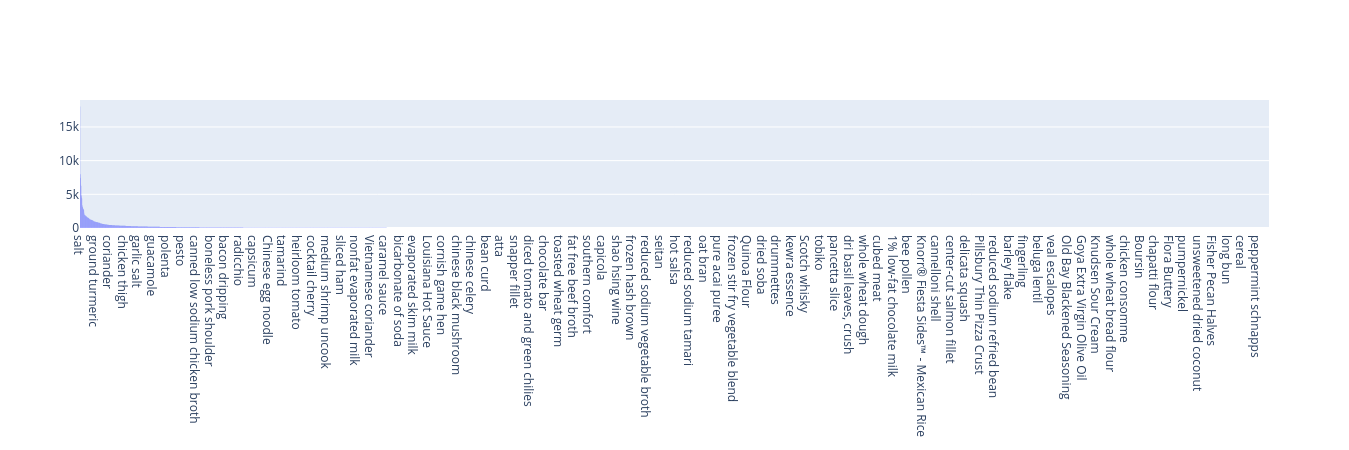

In [15]:
iplot([data])

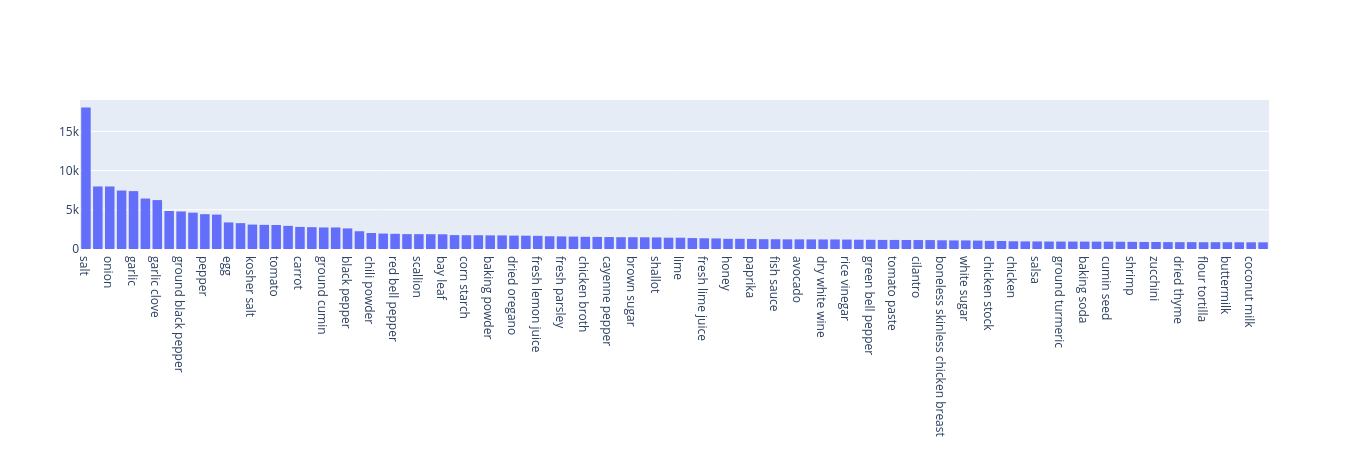

In [16]:
# only most used ingredients

data = go.Histogram(x=np.array(list(ing_counter.keys()))[ing_order][:100], y=np.array(list(ing_counter.values()))[ing_order][:100], histfunc="sum")
iplot([data])

### write ingredient data to file

* get every ingredient that has more than one word

In [17]:
multi_word_ingredients = []

for word in set(stemmed_ingredients):
    if len(word.split()) > 1:
        multi_word_ingredients.append(word)

* writing ingredients to file:

In [18]:
file = open("../" + settings.ingredients_file, "w")

file.write("#!/usr/bin/env python3\n\n")

file.write(f"ingredients = {list(set(ingredients)).__repr__()}\n")
file.write(f"ingredients_stemmed = {list(set(stemmed_ingredients)).__repr__()}\n")
file.write(f"multi_word_ingredients_stemmed = {multi_word_ingredients.__repr__()}\n")

file.close()

## Actions

In [19]:
# manual curated list of cooking verbs, based on:
# https://teflpedia.com/Verbs_used_in_cooking

cooking_verbs = [
    'add',
    'adjust',
    'arrange',
    'bake',
    'baste',
    'batter',
    'beat',
    'blend',
    'boil',
    'braise',
    'break',
    'bread',
    'broil',
    'brown',
    'brush',
    'build',
    'burn',
    'bury',
    'combine',
    'carve',
    'check',
    'chill',
    'chop',
    'clarify',
    'close',
    'cook',
    'cool',
    'correct',
    'cover',
    'crack',
    'crumple',
    'curdle',
    'cut',
    'debone',
    'dice',
    'discard',
    'drain',
    'dress',
    'fillet',
    'flour',
    'fold',
    'freeze',
    'fry',
    'garnish',
    'glaze',
    'grate',
    'grind',
    'grill',
    'gut',
    'heat',
    'knead',
    'lower',
    'macerate',
    'marinate',
    'mash',
    'melt',
    'mince',
    'mix',
    'open',
    'parboil',
    'peel',
    'pickle',
    'place',
    'poach',
    'pour',
    'prepare',
    'pull',
    'put',
    'reduce',
    'refrigerate',
    'remove',
    'rinse',
    'roast',
    'rollout',
    'rollup',
    'rub',
    'salt',
    'sauté',
    'scoop',
    'scorch',
    'scramble',
    'season',
    'serve',
    'set',
    'simmer',
    'skim',
    'slice',
    'slowcook',
    'soak',
    'sour',
    'spice',
    'spoon',
    'spread',
    'sprinkle',
    'squeeze',
    'steam',
    'steep',
    'stir',
    'strain',
    'sugar',
    'sweeten',
    'taste',
    'thaw',
    'thicken',
    'toast',
    'try',
    'warm',
    'wash',
    'waterdown',
    'whip',
    'whisk',
    'wipe'
]

* lemmatize cooking verbs

In [20]:
stemmed_cooking_verbs = [lemmatize(verb) for verb in cooking_verbs]

In [21]:
stemmed_cooking_verbs == cooking_verbs

True

* write to file

In [22]:
file = open("../" + settings.actions_file, "w")

file.write("#!/usr/bin/env python3\n\n")

file.write(f"cooking_verbs = {list(set(cooking_verbs)).__repr__()}\n")
file.write(f"stemmed_cooking_verbs = {list(set(stemmed_cooking_verbs)).__repr__()}\n")

file.close()

## Containers

In [23]:
containers = [
    "oven",
    "pan",
    "frypan",
    "casserole",
    "colander"
    "cookware",
    "processor",
    "grill",
    "broiler",
    "kettle",
    "pot",
    "stockpot",
    "stove",
    "cooker",
    "range",
    "toaster",
    "wok"
]

In [24]:
stemmed_containers = [lemmatize(w) for w in containers]

In [25]:
file = open("../" + settings.container_file, "w")

file.write("#!/usr/bin/env python3\n\n")

file.write(f"containers = {containers.__repr__()}\n")
file.write(f"stemmed_containers = {stemmed_containers.__repr__()}\n")

file.close()

## Placeholders

In [26]:
placeholders = [
    "ingredients",
    "everything"
]

In [27]:
stemmed_placeholders = [lemmatize(w) for w in placeholders]

In [28]:
file = open("../" + settings.placeholder_file, "w")

file.write("#!/usr/bin/env python3\n\n")

file.write(f"placeholders = {placeholders.__repr__()}\n")
file.write(f"stemmed_placeholders = {stemmed_placeholders.__repr__()}\n")

file.close()